<a href="https://colab.research.google.com/github/HoangQuanHCMUTEK19/CNN/blob/main/NhanDienTraiCay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout,Flatten,Conv2D,MaxPooling2D
from keras.datasets import mnist, fashion_mnist, cifar10, cifar100
from tensorflow.keras.optimizers import Adam, RMSprop,SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from keras.utils import np_utils
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.compat.v2 as tf
from tensorflow import keras
import os
import pickle
import pandas as pd
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

In [6]:
#Link Train va test
train_path = "/content/drive/MyDrive/Data"


In [7]:
#Kết nối với google drive 
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [9]:
path_img = []
labels = ['Apple','Banana','Cherry','Dua Vang','Kiwi','Khe','Mango','Mixed','Orange','strawberry']
x_train = []
y_train = []
x_test = []
y_test =[]
# Tao dataset
for i in labels:
  path = os.path.join(train_path,i)
  index_label = labels.index(i)
  for j in os.listdir(path):
      img_path = os.path.join(path, j)
      img = image.load_img(img_path, target_size=(200,200)) 
      img = img_to_array(img)
      img = img.reshape(200,200,3) 
      img = img.astype('float32')
      img = img/255
      x_train.append(img)
      y_train.append(index_label)

#xử lí dữ liệu 
x_train = np.array(x_train) #Chuẩn từ dữ liệu list sang mảng 
y_train = np.array(y_train)
y_train = np_utils.to_categorical(y_train) #đưa về 0 và 1 

In [10]:
#Thiết lập model 
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 32)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 320000)            0         
                                                                 
 dense (Dense)               (None, 256)               81920256  
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 81,923,722
Trainable params: 81,923,722
Non-trainable params: 0
____________________________________________

In [11]:
#Complie Model 
opt=SGD(learning_rate=0.01,momentum=0.9)
model.compile(loss='binary_crossentropy',optimizer=opt, metrics=['accuracy'])

In [12]:
#Training Model 
history = model.fit(x_train,y_train,epochs = 20)

Epoch 1/20
6/6 [==============================] - 11s 59ms/step - loss: 3.1751 - accuracy: 0.1193
Epoch 2/20
6/6 [==============================] - 0s 36ms/step - loss: 1.7699 - accuracy: 0.1250
Epoch 3/20
6/6 [==============================] - 0s 35ms/step - loss: 0.3378 - accuracy: 0.1932
Epoch 4/20
6/6 [==============================] - 0s 35ms/step - loss: 0.3007 - accuracy: 0.3011
Epoch 5/20
6/6 [==============================] - 0s 35ms/step - loss: 0.2662 - accuracy: 0.3636
Epoch 6/20
6/6 [==============================] - 0s 37ms/step - loss: 0.2350 - accuracy: 0.5284
Epoch 7/20
6/6 [==============================] - 0s 36ms/step - loss: 0.2056 - accuracy: 0.6250
Epoch 8/20
6/6 [==============================] - 0s 35ms/step - loss: 0.1803 - accuracy: 0.7330
Epoch 9/20
6/6 [==============================] - 0s 35ms/step - loss: 0.1639 - accuracy: 0.7330
Epoch 10/20
6/6 [==============================] - 0s 35ms/step - loss: 0.1464 - accuracy: 0.8239
Epoch 11/20
6/6 [===========

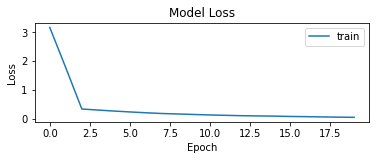

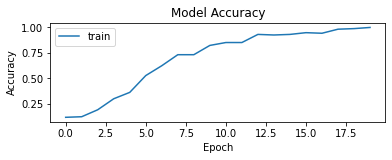

In [13]:
#Vẽ đồ thị loss 
plt.subplot(2,1,1)
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','validation'])
plt.show()
#Vẽ đồ thị Accuracy
plt.subplot(2,1,2)
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','validation'])
plt.show()

Day la Apple


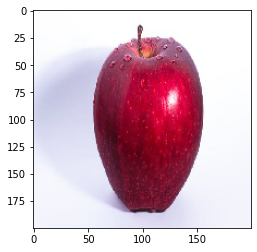

In [15]:
#Load ảnh 
img = image.load_img('apple_93.jpg', target_size=(200,200)) 
plt.imshow(img)
#Chuyển ảnh về mảng 
img = img_to_array(img)
img = img.reshape(1,200,200,3) #thay đổi hình dạng mảng 
img = img.astype('float32') #thay đổi kiểu dữ liệuliệu
img = img/255 #chuẩn hóa dữ liệu thành 0 và  1 
print('Day la '+ labels[np.argmax(model.predict(img))]) #dự đoán 


Day la Orange


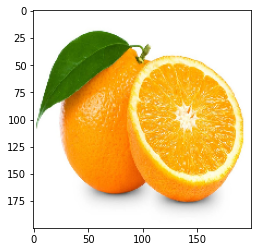

In [16]:
img1 = image.load_img('orange_80.jpg', target_size=(200,200)) 
plt.imshow(img1)
img1 = img_to_array(img1)
img1 = img1.reshape(1,200,200,3) 
img1 = img1.astype('float32')
img1 = img1/255
print('Day la '+ labels[np.argmax(model.predict(img1))]) 


Day la strawberry


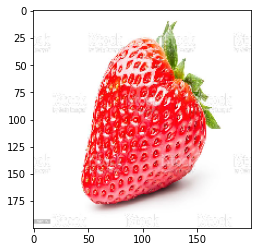

In [18]:
img2 = image.load_img('dautay2.jpg', target_size=(200,200)) 
plt.imshow(img2)
img2 = img_to_array(img2)
img2 = img2.reshape(1,200,200,3) 
img2 = img2.astype('float32')
img2 = img2/255
print('Day la '+ labels[np.argmax(model.predict(img2))]) 